# Session 4

### Library imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the data

In [6]:
emps = pd.read_csv('Employees.csv')
projects = pd.read_csv('Projects.csv', \
                       parse_dates=['Start Date', 'Expected End Date', 'Actual End'])

### Investigate the data

In [7]:
emps.dtypes

EID    int64
PID    int64
dtype: object

In [8]:
projects.describe()

,Project ID,Expected Assigned Employees
count,100.000000,100.000000
mean,50.500000,9.320000
std,29.011492,2.597124
min,1.000000,4.000000
25%,25.750000,7.000000
50%,50.500000,9.000000
75%,75.250000,11.000000
max,100.000000,16.000000


### Investigate employee assignments

In [9]:
projects['Expected Assigned Employees'].sum()

932L

In [10]:
emps['EID'].count()

1090

In [14]:
tmp = emps.groupby(by='PID').count()
tmp.head()

,EID
PID,
1,10
2,14
3,11
4,9
5,12


In [15]:
projects.head()

,Project ID,Start Date,Expected End Date,Actual End,Expected Assigned Employees
0,1,2016-11-22,2017-08-23,2017-09-28,9
1,2,2016-08-12,2017-04-10,2018-11-02,10
2,3,2015-06-18,2016-01-25,2016-04-06,7
3,4,2015-06-20,2016-04-04,2016-01-04,9
4,5,2015-02-07,2016-07-15,2016-11-07,12


In [16]:
new_df = pd.merge(projects, tmp, left_on='Project ID', right_index=True)

In [17]:
new_df.head()

,Project ID,Start Date,Expected End Date,Actual End,Expected Assigned Employees,EID
0,1,2016-11-22,2017-08-23,2017-09-28,9,10
1,2,2016-08-12,2017-04-10,2018-11-02,10,14
2,3,2015-06-18,2016-01-25,2016-04-06,7,11
3,4,2015-06-20,2016-04-04,2016-01-04,9,9
4,5,2015-02-07,2016-07-15,2016-11-07,12,12


In [19]:
new_df['Extra Employees'] =  new_df['EID'] - new_df['Expected Assigned Employees']
#new_df.head()

In [20]:
new_df['Delay'] = (new_df['Actual End'] - new_df['Expected End Date']).dt.days

In [21]:
new_df.head()

,Project ID,Start Date,Expected End Date,Actual End,Expected Assigned Employees,EID,Extra Employees,Delay
0,1,2016-11-22,2017-08-23,2017-09-28,9,10,1,36
1,2,2016-08-12,2017-04-10,2018-11-02,10,14,4,571
2,3,2015-06-18,2016-01-25,2016-04-06,7,11,4,72
3,4,2015-06-20,2016-04-04,2016-01-04,9,9,0,-91
4,5,2015-02-07,2016-07-15,2016-11-07,12,12,0,115


In [22]:
new_df = new_df.rename(columns={'EID': 'Actual Assigned Employees'})

In [23]:
new_df['Extra Employees'].mean()

1.58

In [24]:
new_df.head()

,Project ID,Start Date,Expected End Date,Actual End,Expected Assigned Employees,Actual Assigned Employees,Extra Employees,Delay
0,1,2016-11-22,2017-08-23,2017-09-28,9,10,1,36
1,2,2016-08-12,2017-04-10,2018-11-02,10,14,4,571
2,3,2015-06-18,2016-01-25,2016-04-06,7,11,4,72
3,4,2015-06-20,2016-04-04,2016-01-04,9,9,0,-91
4,5,2015-02-07,2016-07-15,2016-11-07,12,12,0,115


In [25]:
plot_df = new_df.groupby(by='Extra Employees').mean()
plot_df.head()

,Project ID,Expected Assigned Employees,Actual Assigned Employees,Delay
Extra Employees,,,,
0,52.131579,9.315789,9.315789,36.500000
1,50.428571,9.357143,10.357143,40.928571
2,42.714286,9.142857,11.142857,95.357143
3,57.650000,9.100000,12.100000,140.300000
4,43.714286,9.785714,13.785714,183.785714


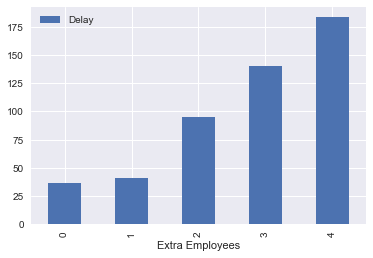

In [26]:
import seaborn as sbn
plot_df.plot.bar(x=plot_df.index.get_level_values('Extra Employees'), y='Delay')

In [27]:
new_df['Extra Employees'].describe()

count    100.000000
mean       1.580000
std        1.505411
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: Extra Employees, dtype: float64

In [28]:
new_df['Delay'].describe()

count    100.000000
mean      86.740000
std      133.899602
min     -262.000000
25%        0.000000
50%       82.000000
75%      157.750000
max      571.000000
Name: Delay, dtype: float64

In [29]:
extra_employees = pd.Series(new_df['Extra Employees'])
delay = pd.Series(new_df['Delay'])
both_above = (extra_employees>extra_employees.mean()) & (delay>delay.mean())
both_below = (extra_employees<extra_employees.mean()) & (delay<delay.mean())
same_direction = both_above | both_below
num_same_direction = same_direction.sum()
num_diff_direction = len(extra_employees)-num_same_direction
print num_same_direction,num_diff_direction
print len(extra_employees)
new_df['Extra Employees'].corr(new_df['Delay'])

73 27
100


0.41331699698314078